# Qiskit Tutorials For Quantum Computing 
 
 https://learn.qiskit.org/course/ch-states/the-atoms-of-computation

## The Atoms of Computation

In [ ]:
# !pip install qiskit
#!pip install qiskit-ibm-runtime

import numpy as np
from numpy import *
import matplotlib as mpl
provider = IBMQ.load_account()

from qiskit import QuantumCircuit, assemble, Aer, transpile, IBMQ
from qiskit.visualization import plot_gate_map, plot_histogram

In [ ]:
# from qiskit_textbook.widgets import binary_widget
# binary_widget(nbits=10)

In [ ]:
# create quantum circuit with x qubits and y bits
qc = QuantumCircuit(4, 2)
# apply a gate to the x qubit (target y)
qc.x(0)
qc.x(1)
qc.cx(0, 2)
qc.cx(1, 2)
# ccx to write the AND of the inputs on qubit 3
qc.ccx(0,1,3)
# qc.s(0)   # Apply S-gate to qubit 0
#qc.sdg(0) # Apply Sdg-gate to qubit 0
# qc.t(0)   # Apply T-gate to qubit 0
# qc.tdg(0) # Apply Tdg-gate to qubit 0
# adds a measurement to the x qubit to the y
qc.measure(2, 0)
qc.measure(3, 1)

# qc.measure_all() # adds measurements to all qubits
# draw the circuit
qc.draw("mpl", initial_state=True)

In [ ]:
# simulator
sim = Aer.get_backend('aer_simulator') 
# simulate the circuit output in the simulator
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

## Representing Qubit states

In [ ]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi
from qiskit.quantum_info import Statevector

In [ ]:
qc1 = QuantumCircuit(1)  # Create a quantum circuit with one qubit
# initial_state = [0,1]   # Define initial_state as |1>
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>
qc1.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc1.draw("mpl")

In [ ]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
qc1.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc1)     # Create a Qobj from the circuit for the simulator to run

result = sim.run(qobj).result() # Do the simulation and return the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector
qc1.measure_all()
qc1.draw("mpl")

In [ ]:
qobj = assemble(qc1)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
# from qiskit_textbook.widgets import plot_bloch_vector_spherical
# [Theta, Phi, Radius]
# coords = [pi/2,0,1] |+>
coords = [0,0,1]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

#convert spherical to cartesian
from qiskit_textbook.widgets import bloch_calc
bloch_calc()

## Single Qubit Gates

In [ ]:
qc2 = QuantumCircuit(1)
qc2.x(0)
qc2.draw("mpl")

qc2.save_statevector()
qobj = assemble(qc2)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [ ]:
# Create the X-measurement function:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw("mpl")

In [ ]:
# P-gate -> rotation around Z axis
from qiskit_textbook.widgets import gate_demo
gate_demo()

## Case For Quantum Computers

In [ ]:
#!pip install bokeh
#%load_ext bokeh_plot
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
bokeh.io.output_notebook(INLINE)
# This code is to create the interactive figure
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, CustomJS, Slider
from bokeh.plotting import figure, show
from bokeh.embed import file_html
from bokeh.resources import CDN
import numpy as np
import IPython

x = np.arange(0,500)
y_linear = x
y_sqrt = 7.5*np.sqrt(x)

linear_source = ColumnDataSource(data=dict(x=x, y=y_linear))
sqrt_source = ColumnDataSource(data=dict(x=x, y=y_sqrt))

plot = figure(
              height=400, 
              width=800,
              sizing_mode="scale_width",
              tools="reset,save",
              x_range=[0, 500], y_range=[0, 500], 
              x_axis_label="Size of Problem",
              y_axis_label="Time Taken to Find Solution")
plot.line('x', 'y', source=linear_source, line_width=3, line_alpha=0.6, color="blue", legend_label="Classical Search O(N)")
plot.line('x', 'y', source=sqrt_source, line_width=3, line_alpha=0.6, color="red", legend_label="Quantum Search O(√N)")
plot.legend.location = "top_left"

callback = CustomJS(args=dict(source=sqrt_source), code="""
        var data = source.data;
        var f = (10-cb_obj.value)*2 + 3
        var x = data['x']
        var y = data['y']
        for (var i = 0; i < x.length; i++) {
            y[i] = f*Math.sqrt(x[i])
        }
        source.change.emit();
    """)

speed_slider = Slider(title="Relative Speed of Quantum Computer", value=7.5, start=1.0, end=10.0, step=0.1, show_value=False)
speed_slider.js_on_change('value', callback)

layout = column(plot, speed_slider)

caption = """
Comparing performance of algorithms across different platforms is difficult. What we can tell (through big-O-notation) is 
despite the difference in speeds between our classical and quantum computers, for a large enough problem, the quantum search 
algorithm will always out-perform the classical search algorithm."""

html_repr = file_html(layout, CDN)
html_fig = "<figure>{0}<figcaption>{1}</figcaption></figure>".format(html_repr, caption)
IPython.display.HTML(html_fig)

In [ ]:
#service = QiskitRuntimeService(channel="ibm_quantum", token="0c6608850e201bf8b37f34926a723c3a304b098346257b24e6dd0a975b1cad1424fa9f02115d94e55ac2f1fc4d782a5ee0db3777a339cdb54f86c5ff37bd2564")

#QiskitRuntimeService.save_account(channel="ibm_quantum", token="0c6608850e201bf8b37f34926a723c3a304b098346257b24e6dd0a975b1cad1424fa9f02115d94e55ac2f1fc4d782a5ee0db3777a339cdb54f86c5ff37bd2564")

# 1. Create a simple quantum program called a 'quantum circuit'.
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, [1, 2])
qc.measure_all()
qc.draw("mpl")

# 2. Ask IBM Quantum for its least busy device that isn't a simulator.
# If you're running this locally, load your IBM Quantum API token using
#     service = QiskitRuntimeService(channel="ibm_quantum", token="ABC")
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(simulator=False, operational=True)
print(f'Running on {backend}')

# 3. Run your circuit on that device
with Session(backend=backend):
    sampler = Sampler()
    result = sampler.run(qc).result()

# 4. Plot the results
from qiskit.visualization import plot_histogram
distribution = result.quasi_dists[0].binary_probabilities()
plot_histogram(distribution)

## Entangled States

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(1)

# This calculates what the state vector of our qubits would be
# after passing through the circuit 'qc'
ket = Statevector(qc)

# The code below writes down the state vector.
# Since it's the last line in the cell, the cell will display it as output
ket.draw("latex")

## Superdense Coding

### Example1

In [ ]:
# NO ENTANGLEMENT

from qiskit import Aer
backend = Aer.get_backend('aer_simulator')

# The message from Alice
MESSAGE = '11'

# Alice encodes the message
qc_alice = QuantumCircuit(2, 2)
if MESSAGE[-1]=='1':
    qc_alice.x(1)
if MESSAGE[-2]=='1':
    qc_alice.x(0)

qc_alice.draw("mpl")

# Bob measures
qc_bob = QuantumCircuit(2,2)
qc_bob.measure([0,1],[1,0]) # same as measure(0,0), measure(1,1)
qc_bob.draw("mpl")
dist = backend.run(qc_alice.compose(qc_bob)).result().get_counts()
plot_histogram(dist)

### Example2

In [ ]:
# ENTANGLEMENT

# PARTIE ALICE
MESSAGE = '00'

qc_alice = QuantumCircuit(2,2)

# Alice encodes the message
if MESSAGE[-1]=='1':
    qc_alice.x(0)
if MESSAGE[-2]=='1':
    qc_alice.x(1)

# then she creates entangled states
qc_alice.h(1)
qc_alice.cx(1,0)
#entangle state

qc_alice.draw("mpl")

In [ ]:
ket = Statevector(qc_alice)
ket.draw("latex")

In [ ]:
# PARTIE BOB
qc_bob = QuantumCircuit(2,2)
# Bob disentangles
qc_bob.cx(1,0)
qc_bob.h(1)
# Then measures
qc_bob.measure([0,1],[0,1])

qc_bob.draw("mpl")

In [ ]:
dist = backend.run(qc_alice.compose(qc_bob)).result().get_counts()
plot_histogram(dist)

### Example3

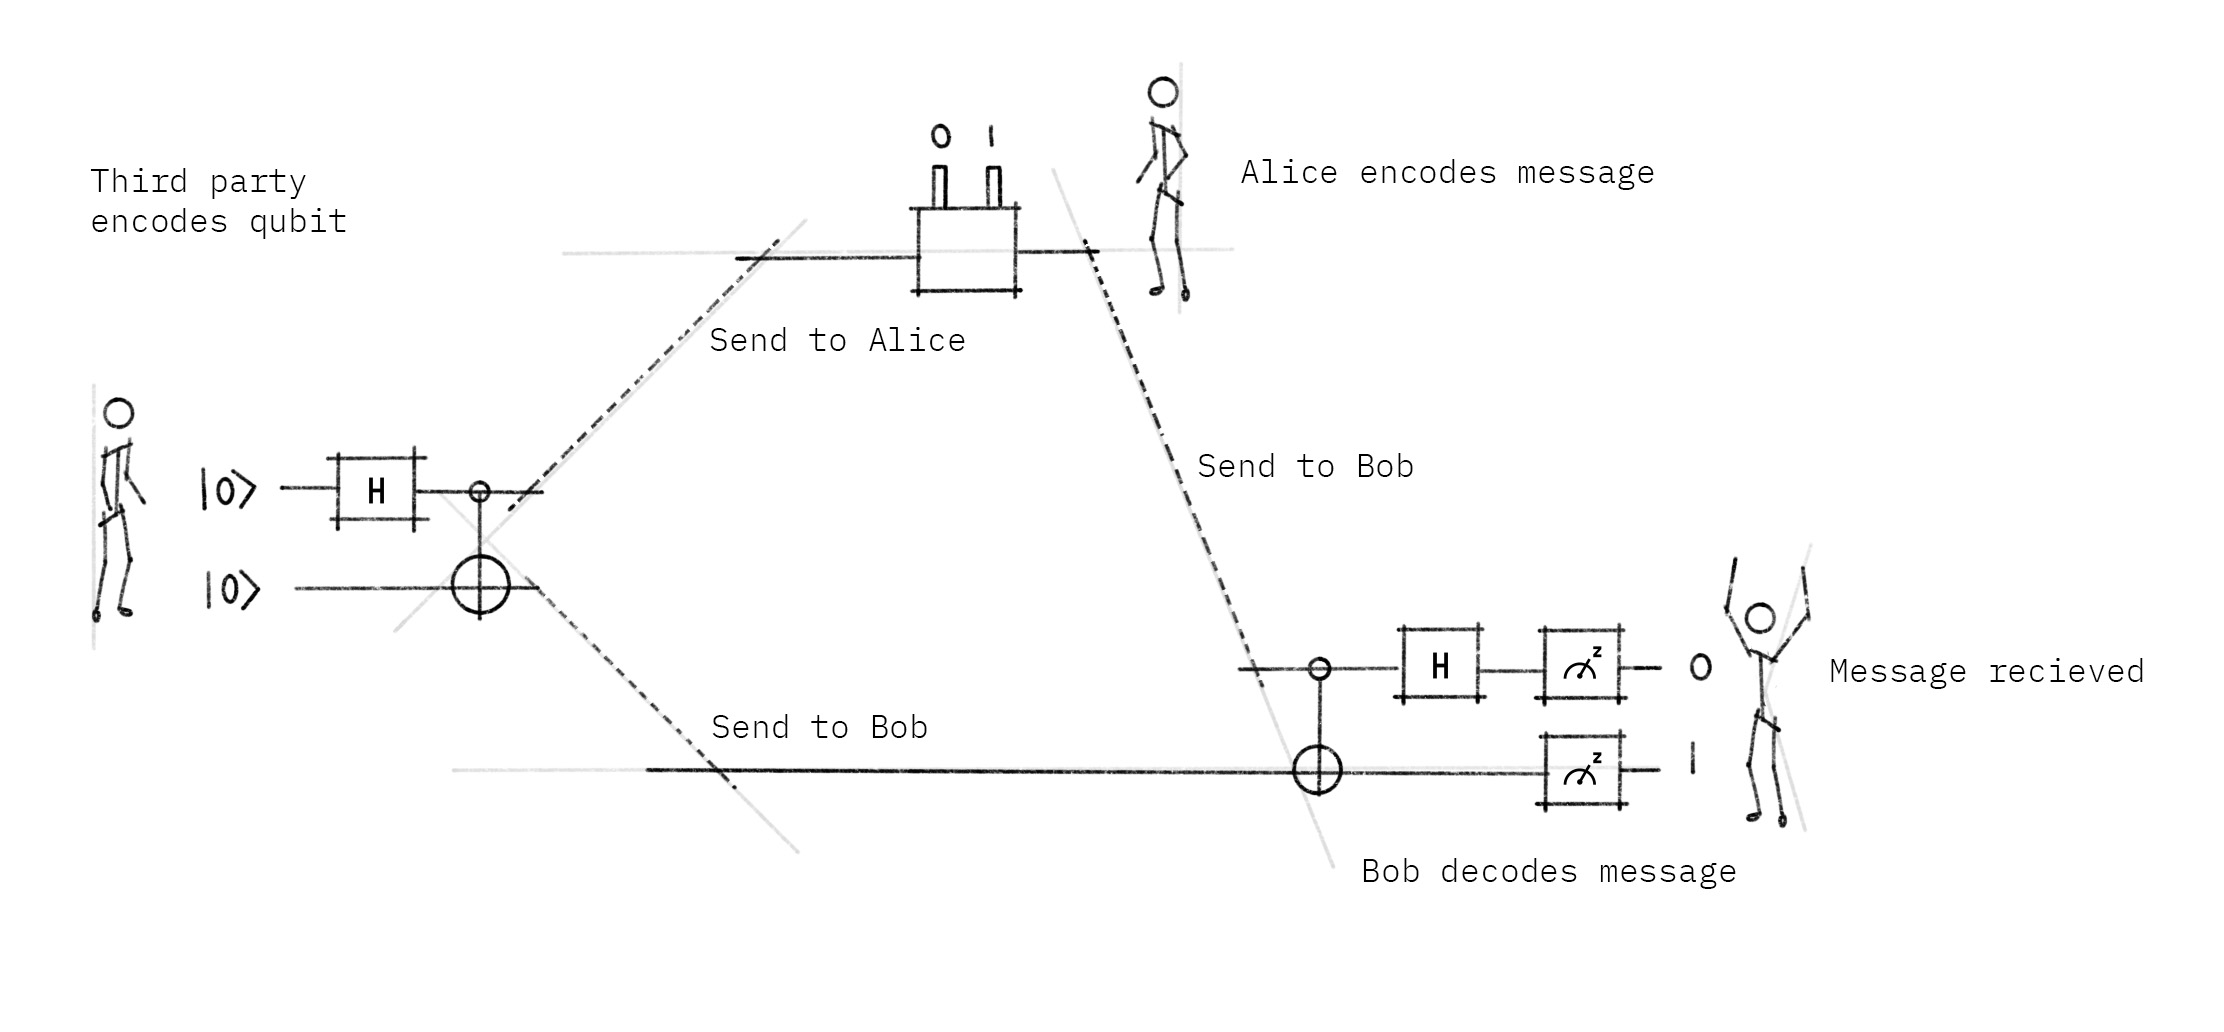

In [ ]:
# PARTIE CHARLIE
# he encode the qubits and send them to alice and bob
qc_charlie = QuantumCircuit(2,2)

qc_charlie.h(1)
qc_charlie.cx(1,0)
qc_charlie.barrier()
qc_charlie.draw("mpl")

In [ ]:
# PARTIE ALICE
MESSAGE = '11'

qc_alice = QuantumCircuit(2,2)

if MESSAGE[-2]=='1':
    qc_alice.z(1)
if MESSAGE[-1]=='1':
    qc_alice.x(1)
qc_alice.barrier()
ket = Statevector(qc_alice)
ket.draw("latex")

In [ ]:
# PARTIE BOB
qc_bob = QuantumCircuit(2,2)
# Bob disentangles
qc_bob.cx(1,0)
qc_bob.h(1)
qc_bob.barrier()
# Then measures
qc_bob.measure([0,1],[0,1])

qc_bob.draw("mpl")

In [ ]:
complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))
complete_qc.draw("mpl")

In [ ]:
dist = backend.run(complete_qc).result().get_counts()
plot_histogram(dist)

## Inegalites de Bells

### NOT QUANTUM

In [ ]:


import random

def setup_variables():
    
    ### Replace this section with anything you want ###
    
    r = random.random()
    
    A = r*(2/3)
    B = r*(1/3)
    
    ### End of section ###
    
    return A, B


def hash2bit(variable, hash_type):
    
    ### Replace this section with anything you want ###
    
    if hash_type == 'V':
        bit = (variable < 0.5)
    elif hash_type == 'H':
        bit = (variable < 0.25)
        
    bit = str(int(bit)) # Turn True or False into '1' and '0'
    
    ### End of section ###
        
    return bit

shots = 8192
def calculate_P():
    P = {}
    for hashes in ['VV','VH','HV','HH']:
        
        # calculate each P[hashes] by sampling over `shots` samples
        P[hashes] = 0
        for shot in range(shots):

            A, B = setup_variables()

            # hash type for variable `A` is the 1st character of `hashes`
            a = hash2bit(A, hashes[0])
            # hash type for variable `B` is the 2nd character of `hashes`
            b = hash2bit(B, hashes[1])

            P[hashes] += (a != b)/shots
 
    return P

P = calculate_P()
print(P)

In [ ]:
def bell_test(P):
    sum_P = sum(P.values())
    for hashes in P:
        
        bound = sum_P - P[hashes]
        
        print("The upper bound for P['"+hashes+"'] is "+str(bound))
        print("The value of P['"+hashes+"'] is "+str(P[hashes]))
        if P[hashes]<=bound:
            print("The upper bound is obeyed :)\n")
        else:
            if P[hashes]-bound < 0.1:
                print("This seems to have gone over the upper bound, "
                      "but only by a little bit :S\nProbably just rounding"
                      " errors or statistical noise.\n")
            else:
                print("This has gone well over the upper bound :O !!!!!\n")
                
bell_test(P)

# -----------------------------------------------------------------------------------------------------------------

# Grover's search algorihm 
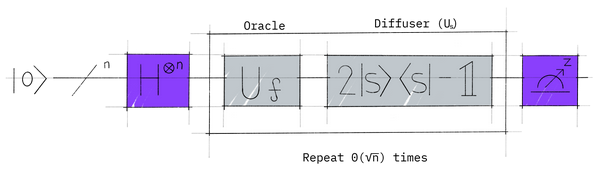

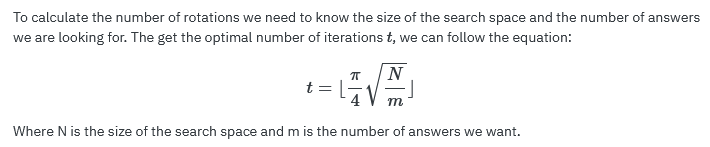
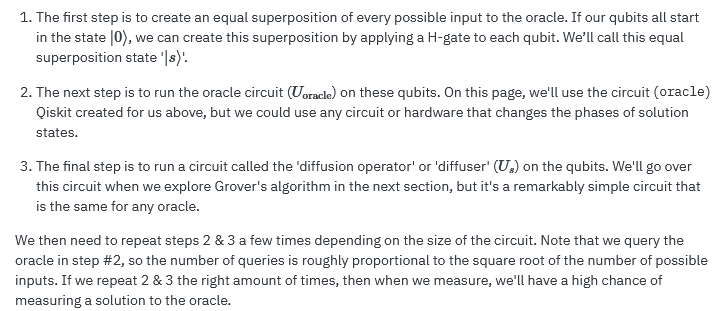

## Example when we are looking for |11>

In [ ]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [ ]:
n = 2

oracle = QuantumCircuit(n)
oracle.cz(0,1)  # invert phase of |11>
oracle.draw('mpl')

In [ ]:
# oracle

oracle = QuantumCircuit(2)
oracle.cz(0,1)  # invert phase of |11>

def display_unitary(qc, prefix=""):
    """Simulates a simple circuit and display its matrix representation.
    Args:
        qc (QuantumCircuit): The circuit to compile to a unitary matrix
        prefix (str): Optional LaTeX to be displayed before the matrix
    Returns:
        None (displays matrix as side effect)
    """
    from qiskit import Aer
    from qiskit.visualization import array_to_latex
    sim = Aer.get_backend('aer_simulator')
    # Next, we'll create a copy of the circuit and work on
    # that so we don't change anything as a side effect
    qc = qc.copy()
    # Tell the simulator to save the unitary matrix of this circuit
    qc.save_unitary()
    unitary = sim.run(qc).result().get_unitary()
    display(array_to_latex(unitary, prefix=prefix))

display_unitary(oracle, "U_\\text{oracle}=")


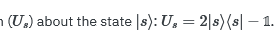

In [ ]:
diffuser = QuantumCircuit(2)
diffuser.h([0, 1])
diffuser.x([0,1])
diffuser.cz(0,1)
diffuser.x([0,1])
diffuser.h([0,1])
diffuser.draw('mpl')

In [ ]:
grover = QuantumCircuit(2)
grover.h([0,1])  # initialise |s>
grover = grover.compose(oracle)
grover = grover.compose(diffuser)
grover.measure_all()
grover.draw('mpl')

In [ ]:
from qiskit import Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
sim = Aer.get_backend('aer_simulator')
dist = sim.run(grover).result().get_counts()
plot_histogram(dist)

## Example with 3 qubits looking for |101> and |110>

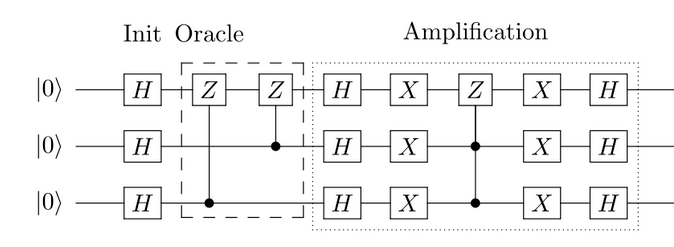

In [ ]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [ ]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [ ]:
qc = QuantumCircuit(3)
qc.cz(0, 2)
qc.cz(1, 2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"

In [ ]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [ ]:
n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.append(oracle_ex3, [0,1,2])
grover_circuit.append(diffuser(n), [0,1,2])
grover_circuit.measure_all()
grover_circuit.draw('mpl')

In [ ]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_grover_circuit = transpile(grover_circuit, qasm_sim)
results = qasm_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

## Exercices

In [ ]:
from qiskit_textbook.problems import grover_problem_oracle
## Example Usage

def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

n = 4
oracle_v0 = grover_problem_oracle(n, variant=1, print_solutions = True)  # 0th variant of oracle, with n qubits
qc = QuantumCircuit(n)
qc.append(oracle_v0, [0,1,2,3])
qc.draw('mpl')



n = 4
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2,3])
grover_circuit.append(oracle_v0, [0,1,2,3])
grover_circuit.append(diffuser(n), [0,1,2,3])
grover_circuit.measure_all()
grover_circuit.draw('mpl')

In [ ]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_grover_circuit = transpile(grover_circuit, qasm_sim)
results = qasm_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

# -----------------------------------------------------------------------------------------------------------------
# Enigmes Quantiques
## #1 porte au tresor

In [ ]:
def lieDetector(qc, qr, cr):
    qc.cx(cr[0], qr[1])
    qc.x(cr[0])
    qc.cx(cr[0], qr[0])
    qc.x(cr[0])
    qc.barrier()

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

guardians = QuantumRegister(2, "Guardian")
lie = QuantumRegister(1, "LIE")
rep = ClassicalRegister(3, "TRUTH")

tresor = QuantumCircuit(guardians, lie, rep)
tresor.draw("mpl")

tresor.h(guardians[0])
tresor.h(lie[0])
tresor.cx(guardians[0], guardians[1])
tresor.barrier()

lieDetector(tresor, guardians, lie)

tresor.swap(guardians[0], guardians[1])
tresor.x(guardians[0:2])

lieDetector(tresor, guardians, lie)

tresor.measure(guardians[0], rep[0])
tresor.measure(guardians[1], rep[1])
tresor.measure(lie[0], rep[2])

tresor.draw("mpl")



In [ ]:
dist = backend.run(tresor).result().get_counts()
plot_histogram(dist)

## #2 Les Quatres Chevelures

In [ ]:
# Pair ou orange = 0    &    Impair ou Mauve = 1

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

a = QuantumRegister(1, "Alice")
b = QuantumRegister(1, "Bob")
c = QuantumRegister(1, "Charlie")
d = QuantumRegister(1, "Dahlia")
res = QuantumRegister(4, "Raisonnement")
#cr = ClassicalRegister(8, "chevelures")

qc = QuantumCircuit(a, b, c, d, res)

for q in range(4):
    qc.h(qc.qubits[q])

qc.barrier()

for q in range(3):
    qc.cx(qc.qubits[q + 1], res[0])
    
qc.barrier()    
    
for q in range(3):
    qc.cx(res[0], res[q + 1])

qc.barrier() 

for q in range(2):
    qc.cx(qc.qubits[q + 2], res[1])
    
qc.barrier()

for q in range(2):
    qc.cx(res[1], res[q + 2])
    
qc.barrier() 

qc.cx(d, res[2])

qc.barrier()

qc.cx(res[2], res[3])

# i = 0
# for q in qc.qubits:
#     qc.measure(q, cr[i])
#     i +1

qc.draw("mpl")

In [ ]:
measured_qc = qc.measure_all(inplace=False)
backend = Aer.get_backend('qasm_simulator') # the device to run on
result = backend.run(transpile(measured_qc, backend), shots=1024).result()
counts  = result.get_counts(measured_qc)
plot_histogram(counts)

# Project

In [ ]:
clause_list = [ [0,1],
               [0,2],
               [1,3],
               [2,3] ]

def XOR(qc, a, b, output):
    qc.cx(a, output)
    qc.cx(b, output)

# Create separate registers to name bits
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit)

# Compute clauses
i = 0
for clause in clause_list:
    XOR(qc, clause[0], clause[1], clause_qubits[i])
    i += 1

# Flip 'output' bit if all clauses are satisfied
qc.mct(clause_qubits, output_qubit)

qc.draw()


var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

def sudoku_oracle(qc, clause_list, clause_qubits):
    # Compute clauses
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

    # Flip 'output' bit if all clauses are satisfied
    qc.mct(clause_qubits, output_qubit)

    # Uncompute clauses to reset clause-checking bits to 0
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

sudoku_oracle(qc, clause_list, clause_qubits)
qc.draw()



var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

# Initialize 'out0' in state |->
qc.initialize([1, -1]/np.sqrt(2), output_qubit)

# Initialize qubits in state |s>
qc.h(var_qubits)
qc.barrier()  # for visual separation

## First Iteration
# Apply our oracle
sudoku_oracle(qc, clause_list, clause_qubits)
qc.barrier()  # for visual separation
# Apply our diffuser
qc.append(diffuser(4), [0,1,2,3])

## Second Iteration
sudoku_oracle(qc, clause_list, clause_qubits)
qc.barrier()  # for visual separation
# Apply our diffuser
qc.append(diffuser(4), [0,1,2,3])

# Measure the variable qubits
qc.measure(var_qubits, cbits)

qc.draw('mpl', fold=-1)

In [ ]:
# Simulate and plot results
qasm_simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, qasm_simulator)
result = qasm_sim.run(transpiled_qc).result()
plot_histogram(result.get_counts())

# My Grover's implementation

In [8]:
#!pip install qiskit
#!pip install qiskit-ibm-runtime

#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.circuit.library import MCMT, MCMTVChain, Diagonal

# import math tools
from math import floor, ceil, sqrt, pi, log2

In [2]:
def Initialize_s(qc):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qc.qubits:
        qc.h(q)
    return qc

def Diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

def CreateOracle(messages, n):
    diagonal = [1]*(2**n)
    #print('diagonal = ', diagonal)
    for message in messages:
        diagonal[int(message, 2)] = -1
        #print('message =', int(message, 2))
    return diagonal

def GroverOracle(n, messages, print_solutions=False):
    
    nsolutions = len(messages)
    diagonal= CreateOracle(messages, n)
    #print(diagonal)
    oracle_gate = Diagonal(diagonal)
    oracle_gate.name = "Oracle\nn=%i" % (n)
    if print_solutions:
        print("Solutions:")
        for idx, e in enumerate(diagonal):
            if e < 1:
                print("|%s>" % format(idx, "0%ib" % n))
    return oracle_gate

def AppendOracle(qc, oracle):
    array = []
    for n in range(len(qc.qubits)):
        array.append(n)
    qc.append(oracle, array)
    
def AppendDiffuser(qc, nqubits):
    array = []
    for n in range(nqubits):
        array.append(n)
    qc.append(Diffuser(nqubits), array)

Solutions:
|0010>
|1000>
Solutions:
|0010>
|1000>


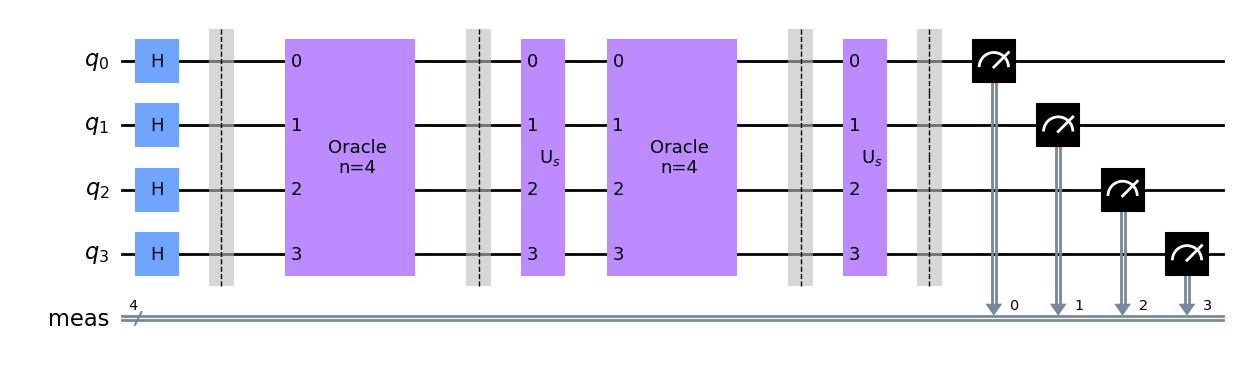

In [22]:
messages1 = ["0010", "1000"]
messages2 = ["10000"]
messages3 = ["101"]
messages = ["00", "11"]

chosenMessages = messages1
nqubits = len(chosenMessages[0])

qc = QuantumCircuit(nqubits, name = "Charlie")


# building charlie circuit
qc = Initialize_s(qc)
qc.barrier()
#qc_c.draw("mpl")
oracle = GroverOracle(nqubits, chosenMessages, True)
AppendOracle(qc, oracle)

qc.barrier()

AppendDiffuser(qc, nqubits)


oracle = GroverOracle(nqubits, chosenMessages, True)
AppendOracle(qc, oracle)

qc.barrier()

AppendDiffuser(qc, nqubits)
qc.measure_all()


#qc = qc_c.compose(qc_a.compose(qc_b))


qc.draw("mpl")

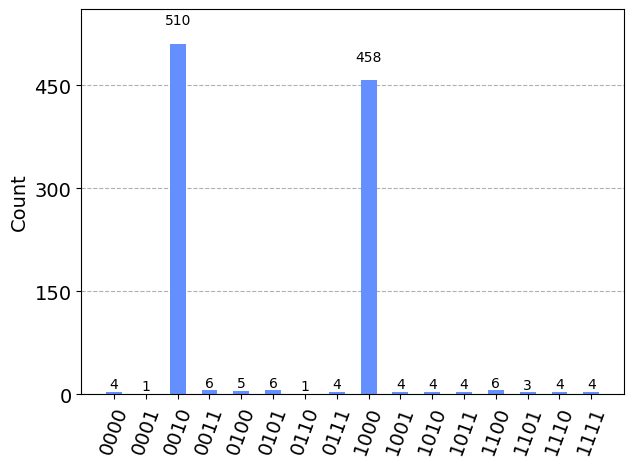

In [23]:
# Simulate and plot results
qasm_simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, qasm_simulator)
result = qasm_simulator.run(transpiled_qc).result()
plot_histogram(result.get_counts())

In [15]:
# Simulate state vectors
sv_sim = Aer.get_backend('statevector_simulator')
transpiled_qc = transpile(qc, sv_sim)
result = sv_sim.run(transpiled_qc).result()
statevec = result.get_statevector()

simplestatevec = []
y = 0
for i in statevec:
        simplestatevec.append(statevec[y])
        y += 1
    
# print(simplestatevec)
array_to_latex(statevec,  prefix="|\\psi\\rangle =",max_size=128)

/tmp/ipykernel_9005/2148363273.py:9: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i in statevec:


<IPython.core.display.Latex object>

# My Superdense Coding

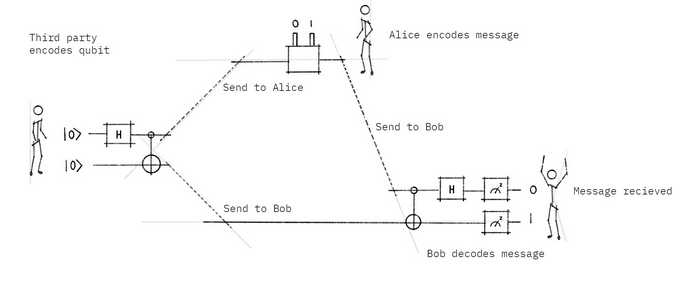

In [ ]:
#!pip install qiskit
#!pip install qiskit-ibm-runtime

#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

from qiskit.circuit.library import MCMT, MCMTVChain, Diagonal

In [ ]:
def Initialize_S(qc):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qc.qubits:
        qc.h(q)
    return qc

def FindAvailability(calendar):
    i = 0
    array = []
    for n in calendar:
        if n == 0:
            array.append(i)
        i += 1
    return array

def ApplyAvailabilityToQC(qc, array):
    for i in array:
        qc.x(i)

def CreateBellPairCircuit():
    """
    Returns:
        QuantumCircuit: Circuit that produces a Bell pair
    """
    qc = QuantumCircuit(2, name="Charlie")
    qc.h(1)
    qc.cx(1, 0)
    return qc

def CreateBellPair(qc):
    """
    Returns:
        QuantumCircuit: Circuit that produces a Bell pair
    """
    qc.h(1)
    qc.cx(1, 0)

    
def BellMeasurement(qc, target, control):
    qc.cx(target, control)
    qc.h(target)
    
def encodeMessage(qc, qubit, msg):
    """Encodes a two-bit message on qc using the superdense coding protocol
    Args:
        qc (QuantumCircuit): Circuit to encode message on
        qubit (int): Which qubit to add the gate to
        msg (str): Two-bit message to send
    Returns:
        QuantumCircuit: Circuit that, when decoded, will produce msg
    Raises:
        ValueError if msg is wrong length or contains invalid characters
    """
    if len(msg) != 2 or not set(msg).issubset({"0","1"}):
        raise ValueError(f"message '{msg}' is invalid")
    if msg[1] == "1":
        qc.x(qubit)
    if msg[0] == "1":
        qc.z(qubit)

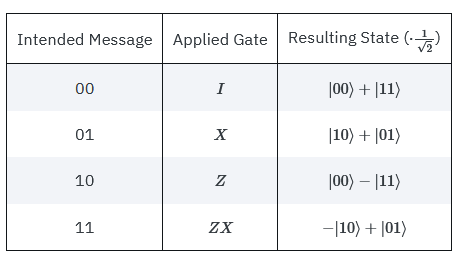

In [ ]:
message = "11"

qc = CreateBellPairCircuit()

qc.barrier()

qc_a = QuantumCircuit(2, name = "Alice")
encodeMessage(qc_a, 1, message)

qc_b = QuantumCircuit(2, name = "Bob")
BellMeasurement(qc_b, 1, 0)
qc_a.barrier()

qc = qc.compose(qc_a.compose(qc_b))

qc.measure_all()

qc.draw("mpl") #, reverse_bits = True)

In [ ]:
# Simulate and plot results
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

In [ ]:
## with swaps

message = "10"

qc_c = QuantumRegister(2, name = "Charlie")
qc_a = QuantumRegister(2, name = "Alice")
qc_b = QuantumRegister(2, name = "Bob")
cr = ClassicalRegister(2, name = "Message Decoded")

qc = QuantumCircuit(qc_c, qc_a, qc_b, cr)

CreateBellPair(qc)
qc.swap(qc_c[0], qc_a[1])
qc.swap(qc_c[1], qc_b[0])
qc.barrier()

encodeMessage(qc, 3, message)
qc.barrier()

qc.swap(qc_a[1], qc_b[1])
BellMeasurement(qc, 5, 4)


qc.measure(qc_b[0], cr[0])
qc.measure(qc_b[1], cr[1])

qc.draw("mpl") #, reverse_bits = True)

In [ ]:
# Simulate and plot results
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

## Calendar problem attempt

In [ ]:
# Diffuser

nqubits = 8
qc = QuantumCircuit(nqubits)
# Apply transformation |s> -> |00..0> (H-gates)
for qubit in range(nqubits):
    qc.h(qubit)
# Apply transformation |00..0> -> |11..1> (X-gates)
for qubit in range(nqubits):
    qc.x(qubit)
# Do multi-controlled-Z gate
qc.h(nqubits-1)
qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
qc.h(nqubits-1)
# Apply transformation |11..1> -> |00..0>
for qubit in range(nqubits):
    qc.x(qubit)
# Apply transformation |00..0> -> |s>
for qubit in range(nqubits):
    qc.h(qubit)

qc.draw('mpl')

In [1]:
#!pip install qiskit
#!pip install qiskit-ibm-runtime

#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCMT, MCMTVChain, Diagonal

# import math tools
from math import floor, ceil, sqrt

In [2]:
#######################################################################################################    
    
#      UTILITY
    
#######################################################################################################

def Initialize_S(qc, first, last):
    """Apply a H-gate to 'qubits' in qc"""
    for q in range(last - first):
        qc.h(q + first)
    return qc

def measureQc(first, last):
    #measure the qubits
    i = 0
    
    
#######################################################################################################    
    
#      GROVER
    
#######################################################################################################

def Diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

def CreateDiagonal(messages, n):
    diagonal = [1]*(2**n)
#     print('diagonal = ', diagonal)
    for message in messages:
        diagonal[int(message, 2)] = -1
#         print('message =', int(message, 2))
    return diagonal

def CreateOracle(n, messages, print_solutions=False):
    
    nsolutions = len(messages)
    diagonal= CreateDiagonal(messages, n)
#     print(diagonal)
    oracle_gate = Diagonal(diagonal)
    oracle_gate.name = "Oracle\nn=%i" % (n)
    if print_solutions:
        print("Solutions:")
        for idx, e in enumerate(diagonal):
            if e < 1:
                print("|%s>" % format(idx, "0%ib" % n))
    return oracle_gate

def AppendOracle(qc, qr, nqubits, oracle):
    array = []
    for n in range(nqubits):
        array.append(qr * nqubits + n)
    qc.append(oracle, array)
    
def AppendDiffuser(qc, qr, nqubits):
    array = []
    for n in range(nqubits):
        array.append(qr * nqubits + n)
    qc.append(Diffuser(nqubits), array)   
    
def ApplyGrover(qc, oracle, nqubits):
    iterations = ceil(sqrt(2**nqubits)) - 1
    for it in range(iterations):
        AppendOracle(qc, 0, nqubits, oracle)
        AppendDiffuser(qc, 0, nqubits)
#         qc.barrier()
        
def ApplyMultiGrover(qc, qr, nqubits, oracle):
    iterations = ceil(sqrt(2**nqubits)) - 1
    for it in range(iterations):
        AppendOracle(qc, qr, nqubits, oracle)
        AppendDiffuser(qc,qr,  nqubits)

        
def ApplySingleMapping(qc, nqubits):
    for q in range(nqubits):
        qc.cx(q, q + nqubits)
        
def ApplyMultiMapping(qc, nqubits):
    for q in range(nqubits):
        qc.ccx(q,  q + 2* nqubits, q + nqubits)
        
#######################################################################################################    
    
#      DISTRIBUTION
    
#######################################################################################################



def FindAvailability(calendar):
    i = 0
    array = []
    for n in calendar:
        if n == "1":
            array.append(i)
        i += 1
    print("indexes ", array)
    return array

def CreateBellPairCircuit():
    """
    Returns:
        QuantumCircuit: Circuit that produces a Bell pair
    """
    qc = QuantumCircuit(2, name="Charlie")
    qc.h(1)
    qc.cx(1, 0)
    return qc

def CreateBellPair(qc):
    """
    Returns:
        QuantumCircuit: Circuit that produces a Bell pair
    """
    qc.h(1)
    qc.cx(1, 0)

    
def BellMeasurement(qc, target, control):
    qc.cx(target, control)
    qc.h(target)
    
def encodeMessage(qc, qubit, msg):
    """Encodes a two-bit message on qc using the superdense coding protocol
    Args:
        qc (QuantumCircuit): Circuit to encode message on
        qubit (int): Which qubit to add the gate to
        msg (str): Two-bit message to send
    Returns:
        QuantumCircuit: Circuit that, when decoded, will produce msg
    Raises:
        ValueError if msg is wrong length or contains invalid characters
    """
    if len(msg) != 2 or not set(msg).issubset({"0","1"}):
        raise ValueError(f"message '{msg}' is invalid")
    if msg[1] == "1":
        qc.x(qubit)
    if msg[0] == "1":
        qc.z(qubit)

        
def CalendarToQc(qc, calendar, n):
    c = calendar[0]
    for i in range(n):
        if c[i] == "1":
            qc.x(i)


Solutions:
|1101>
Solutions:
|1011>


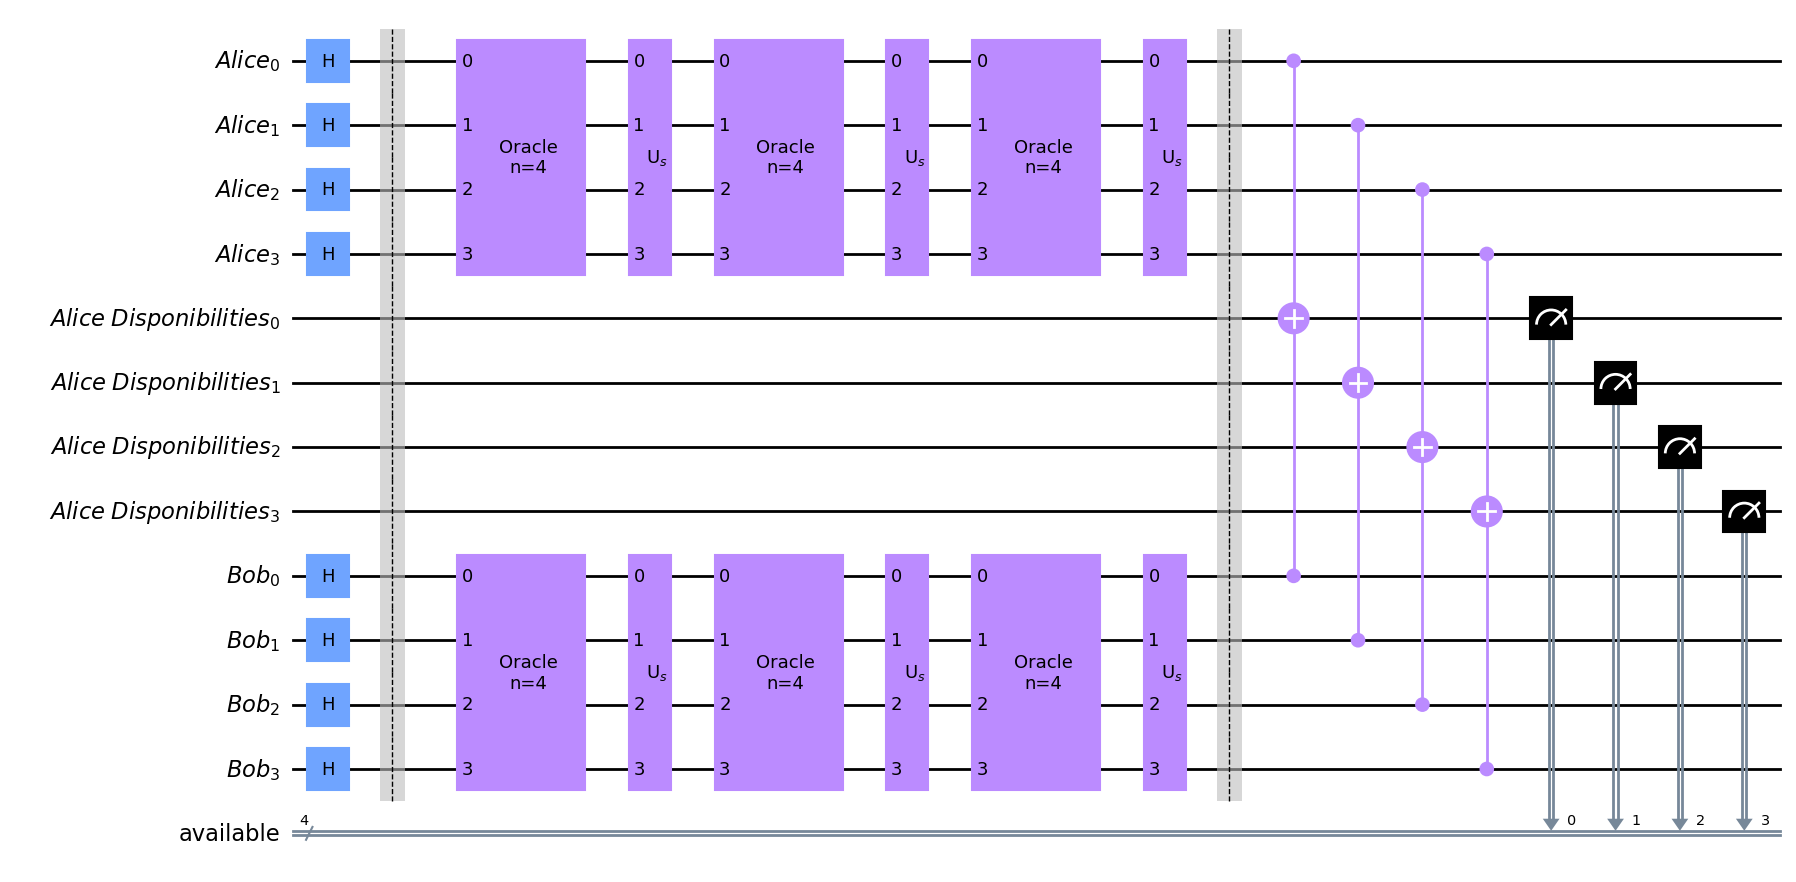

In [9]:
calendar_a = ["1101"]
calendar_b = ["1011"]
nqubits = len(calendar_a[0])

qc_a = QuantumRegister(nqubits, name = "Alice")
qc_a_i = QuantumRegister(nqubits, name = "Alice Disponibilities")
qc_b = QuantumRegister(nqubits, name = "Bob")
cr = ClassicalRegister(nqubits, name = "available")
qc = QuantumCircuit(qc_a, qc_a_i, qc_b, cr)

Initialize_S(qc, 0, nqubits)
Initialize_S(qc, 2 * nqubits, 3 * nqubits)
# ApplyAvailabilityToQC(qc_a, availability_a)
qc.barrier()

oracle_a = CreateOracle(nqubits, calendar_a, print_solutions=True)
oracle_b = CreateOracle(nqubits, calendar_b, print_solutions=True)


ApplyGrover(qc, oracle_a, nqubits)
ApplyMultiGrover(qc, 2, nqubits, oracle_b)
qc.barrier()

# CalendarToQc(qc, calendar_a, nqubits_a)

ApplyMultiMapping(qc, nqubits)

qc.measure(4, 0)
qc.measure(5, 1)
qc.measure(6, 2)
qc.measure(7, 3)
# CheckAvailabilityQc(qc, calendar_b)

qc.draw("mpl")

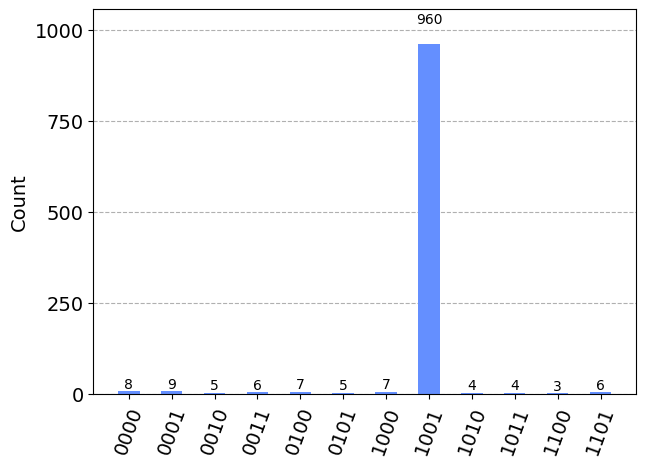

In [10]:
# Simulate and plot results
qasm_simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, qasm_simulator)
result = qasm_simulator.run(transpiled_qc).result()
plot_histogram(result.get_counts())

Solutions:
|1001>


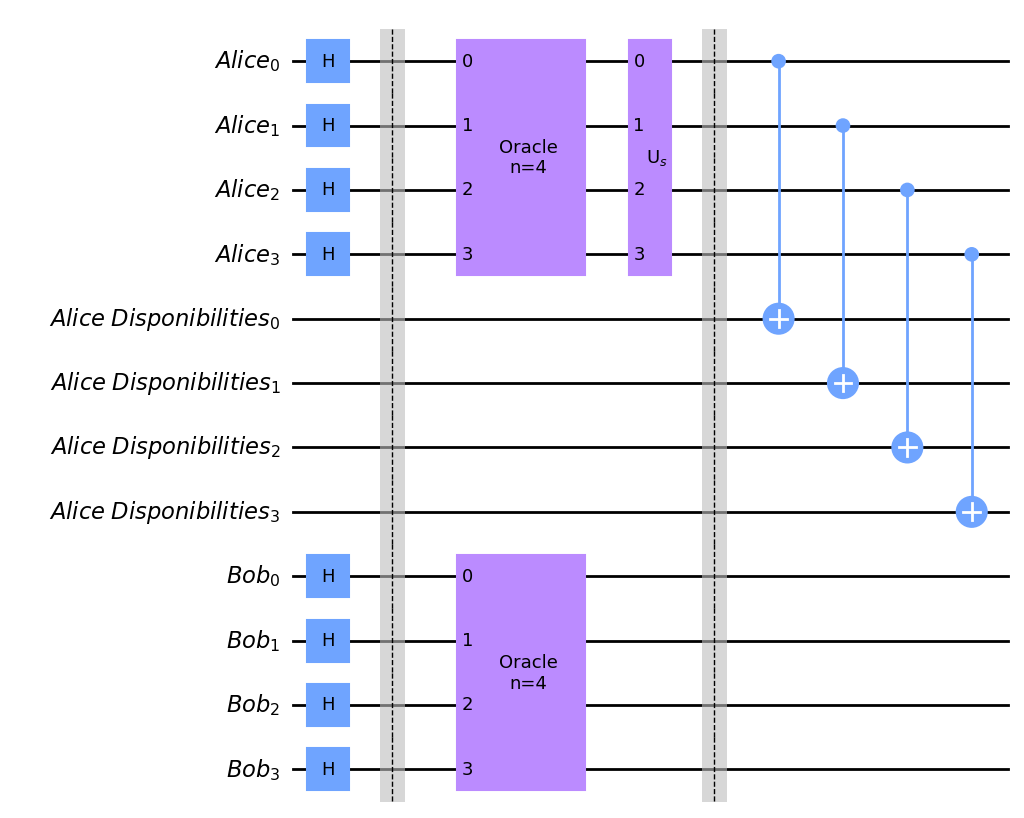

In [12]:
calendar_a = ["1001"]
calendar_b = ["1011"]
nqubits = len(calendar_a[0])


# qc_a = QuantumCircuit(nqubits_a, name = "Alice")
qc_a = QuantumRegister(nqubits, name = "Alice")
qc_a_i = QuantumRegister(nqubits, name = "Alice Disponibilities")
qc_b = QuantumRegister(nqubits, name = "Bob")
qc = QuantumCircuit(qc_a, qc_a_i, qc_b)

i = 0
Initialize_S(qc, 0, nqubits)
Initialize_S(qc, 2 * nqubits, 3 * nqubits)

qc.barrier()

oracle = CreateOracle(nqubits, calendar_a, print_solutions=True)
AppendOracle(qc, 0, nqubits, oracle)
AppendOracle(qc, 2, nqubits, oracle)
AppendDiffuser(qc, 0, nqubits)
qc.barrier()


# ApplyGrover(qc, oracle, nqubits)

# CalendarToQc(qc, calendar_a, nqubits_a)

ApplySingleMapping(qc, nqubits)

# CheckAvailabilityQc(qc, calendar_b)

# qc.measure_all()

qc.draw("mpl")